# Binary Trees

A binary tree is a tree data structure in which each node has at most two children, which are referred to as the left child and the right child. 

There are two special nodes, the Root and leave nodes.
The Root node is the topmost node in the tree in which all Nodes are connected to and is the only node to not have a parent node.
Leaf nodes are nodes which reside in the last level of a binary tree and they don't have any children.

For more detailed information:
https://en.wikipedia.org/wiki/Binary_tree

We will use the Python Library binarytree to visualize our tree to help us better understand what is going on.

**Make sure that you have the binarytree library installed.
If not, find the details here:**
https://pypi.org/project/binarytree/

In [1]:
from binarytree import Node

# Inserting a New Node

## Creating a new Node

We will begin by creating a node will will be the basis of our binary tree.

Our node object will consist of three attributes:
data: which will contain the data the Node will hold (For our examples, we will use integers)
left: holds the object of the left Node
right: holds the object of the right Node

Below is the class of the Node object

class Node(object):

    def __init__(self, value, left=None, right=None):
        self.value = value  # The node value
        self.left = left    # Left child
        self.right = right  # Right child

In [2]:
root = Node(1)
print(root)


1



We can see in the above example that after we instantiate the Node that the value of the node is printed.
We can also see that this node does not have either a left child or a right child.

**This solution has the time complexity of O(1)**

## Inserting a Node to the left

In this next example, we will insert a Node to the left which will be the left child of the root node.

In [3]:
def insert_left(root, value):
    root.left = Node(value)

insert_left(root, 2)
print(root)


  1
 /
2



We can see that by assigning the left attribute of the root node to a new instantiated node with a value of 2. The left child of the root node now has the value of 2.

But what do we do if the node already has a left child. 

We will update our insert_left functon to replace the current left child with a new node and have the current left child be the left child of the new node.

In [4]:
def insert_left(root, value):
    if (root.left):
        old_left = root.left
        root.left = Node(value)
        root.left.left = old_left
    else:
        root.left = Node(value)

insert_left(root, 3)

Here we can see that the Node with the value of 2 has been replaced with 3 and the left node has shifted downward to become the left child of 3 as well.

**This solution has the time complexity of O(1)**

## Inserting a Node to the right

In this next example, we will insert a Node to the right which will be the right child of the root node.

In [5]:
def insert_right(root, value):
    root.right = Node(value)

insert_right(root, 4)
print(root)


    1
   / \
  3   4
 /
2



We can see that now our root node now has a right child with the value of four. 
However, just like with our insert_left function let's make sure that if there is already a right child to replace it and place it as the right child of the inserted node.

In [6]:
def insert_right(root, value):
    if (root.right):
        old_right = root.right
        root.right = Node(value)
        root.right.right = old_right
    else:
        root.right = Node(value)

insert_right(root, 5)
print(root)


    1
   / \
  3   5
 /     \
2       4



Now, just as with the insert_left function, we now have inserted a node on the right side.

**This solution has the time complexity of O(1)**

# Delete a Binary Tree

We will now write a function which will delete a binary tree.
Let's start by showing our binary tree

In [7]:
print(root)


    1
   / \
  3   5
 /     \
2       4



Now let's create a function delete_tree which will delete the tree.
We will include a print statement in the function to show which node we are deleting in which order.

In [8]:
def delete_tree(root):
    if not root:
        return
    delete_tree(root.left)
    delete_tree(root.right)
    print("Deleting node:", root.value)
    root.left = None
    root.right = None
    
delete_tree(root)
print("Tree Deleted")

Deleting node: 2
Deleting node: 3
Deleting node: 4
Deleting node: 5
Deleting node: 1
Tree Deleted


We can see from the values that are deleted that in each step we are deleting each node starting from the left branch recursively and then recursively deleting to the right branches before finally deleting the root node.

**This solution has the time complexity of O(n) because we will have to traverse through every node in the tree**

# Checking if a node is a Leaf Node

We will next create a function which checks if a given Node is a leaf node.
Remember, a leaf node are nodes which reside in the last level of a binary tree and they don't have any children.
So if we check if a node does not have both a left child or a right child, the node must be a leaf node.

Let's create the check_leaf function to check if a node is a leaf and a helper function to print whether a node is a leaf or not. Let's compare the root node and the left most child of root.

Let's first recreate the binary tree that we had before:

In [9]:
root = Node(1)
insert_left(root, 2)
insert_left(root, 3)
insert_right(root, 4)
insert_right(root, 5)

print(root)


    1
   / \
  3   5
 /     \
2       4



In [10]:
def check_leaf(node):
    return not node.left and not node.right

def if_leaf(node):
    if check_leaf(node):
        print("Node %d is a leaf" %(node.value))
    else:
        print("Node %d is not a leaf" %(node.value))

print(root)
if_leaf(root)
if_leaf(root.left.left)


    1
   / \
  3   5
 /     \
2       4

Node 1 is not a leaf
Node 2 is a leaf


We can see that the root node (value:1) is not a leaf node because it has two children (3 and 5). However, if we check the Node 2 (root.left.left) we can see that it is a leaf node because there are no children.

**This solution has the time complexity of O(1)**

# Traversing a Binary Tree

## Pre-order Traversal

Tree traversal (also known as tree search) is a form of graph traversal and refers to the process of visiting (checking and/or updating) each node in a tree data structure, exactly once.

There are three types we will cover:
1. Pre-order Traversal
2. In-order Traversal
3. Post-order Traversal

These searches are referred to as depth-first search (DFS), as the search tree is deepened as much as possible on each child before going to the next sibling. For a binary tree, they are defined as display operations recursively at each node.

Say we have the following binary tree:

In [11]:
root = Node(1)
insert_left(root, 4)
insert_left(root, 2)
insert_right(root, 6)
insert_right(root, 3)
insert_left(root.right, 7)
insert_left(root.right, 5)
insert_right(root.right.left, 8)

print(root)


    1______
   /       \
  2       __3
 /       /   \
4       5     6
       / \
      7   8



In Pre-order traversal, we start at the root and traverse down the left branch until we reach the lowest level on the left. Then we move over to the top of the right branch and recursively traverse the left side until we reach the end of the right branch.

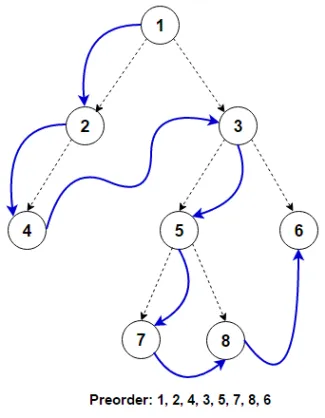

In [12]:
def preorder_traversal(root):
    if not root:
        return
    print(root.value, end=' ')
    preorder_traversal(root.left)
    preorder_traversal(root.right)

preorder_traversal(root)

1 2 4 3 5 7 8 6 

**This solution has the time complexity of O(n) because we will have to traverse through every node in the tree**

## In-order Traversal

For In-order traversal, as the name suggests we start at the very left node first, then traverserse through to the right in order from left to right with the root somewhere in the middle.

As can be seen in this image:

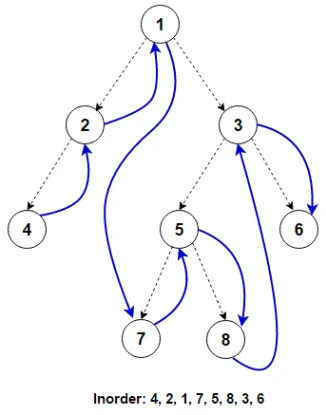

In [13]:
def inorder_traversal(root):
    if not root:
        return
    inorder_traversal(root.left)
    print(root.value, end=' ')
    inorder_traversal(root.right)

inorder_traversal(root)

4 2 1 7 5 8 3 6 

**This solution has the time complexity of O(n) because we will have to traverse through every node in the tree**

## Post-order Traversal

Lastly in Post-order traversal, we take these three steps:
1. Recursively traverse the left subtree
2. Then recursively traverse through the right subtree
3. Then finally process the root node at the end

Again, here is an image which describes a Post-order traversal:

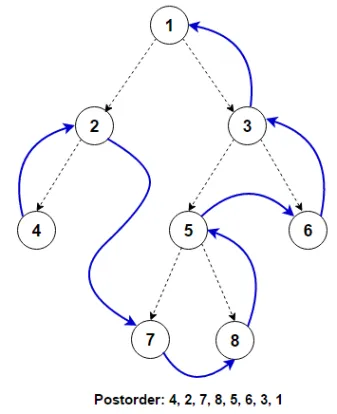

In [14]:
def postorder_traversal(root):
    if not root:
        return
    postorder_traversal(root.left)
    postorder_traversal(root.right)
    print(root.value, end=' ')

postorder_traversal(root)

4 2 7 8 5 6 3 1 

**This solution has the time complexity of O(n) because we will have to traverse through every node in the tree**

## Breadth Level Traversal (or Level Order Traversal)

You will notice with the past three methods of traversing the binary tree that all three methods do not traverse the tree in a level by level order. That is what Breadth Level or Level Order Traversal does!

However, we are not able to simply make recursive calls on this one as recursion tends to go through all nodes on each side before moving over and it has trouble moving back once it has moved down a branch.

Therefore, we will use another Data Structure called a Queue to help us go one by one.
A queue is a data structure in which data is stored in a linear First In First Out fashion.
Imagine being in the line at the grocery store. The first person in line is the first to checkout. 
More details here: 
https://en.wikipedia.org/wiki/Queue_(abstract_data_type)

We will use the **deque** module from the **collections** library in Python

In [15]:
from collections import deque

How we will go about traversing level by level is we start our function with the root node in our queue. We will then *pop* the root node. Then if the node has a left or right child, we will enqueue the nodes into our queue and we will use them to enqueue the child nodes once we *pop* from the queue. 

I was not able to find a great visual but I found this video to be most helpful:
https://www.youtube.com/watch?v=86g8jAQug04

In [16]:
def breadth_level(root):
    if root:
        queue = [root]
        while queue:
            node = queue.pop()
            print(node.value, end=' ')
            if node.left:
                queue.insert(0, node.left)
            if node.right:
                 queue.insert(0, node.right)
                    
print(root)
breadth_level(root)


    1______
   /       \
  2       __3
 /       /   \
4       5     6
       / \
      7   8

1 2 3 4 5 6 7 8 

**This solution has the time complexity of O(n) because we will have to traverse through every node in the tree. However due to the queue the space complexity would also be of O(n) compared to O(h) in a depth level traversal where h is height**

# Dimensions of a Binary Tree

## The Height of a Binary Tree

The height of a binary tree is the largest number of edges in a path from the root node to a leaf node. Essentially, it is the height of the root node. Note that if a tree has only one node, then that node is at the same time the root node and the only leaf node, so the height of the tree is 0.

Let's take the following binary tree:

In [17]:
print(root)


    1______
   /       \
  2       __3
 /       /   \
4       5     6
       / \
      7   8



If we count the edges from root down the longest branch on the left side we find 2 edges. However, if we count the edges of the longest branch on the right side we find 3 edges. Therefore, this tree would have the height of 3.

Here is the following code to find the height of a binary tree:

In [18]:
def find_height(root):
    if not root:
        return -1
    else:
        left = find_height(root.left)
        right = find_height(root.right)
        return max(left, right) + 1
       
print("The height of this binary tree is %d" %(find_height(root)))

The height of this binary tree is 3


**This solution has the time complexity of O(n) because we will have to traverse through every node in the tree**

## Size of a Binary Tree

The size of a binary tree is the total number of nodes in that tree.

So to find the size of a binary tree we will traverse the whole tree and count the number of nodes in the tree.

Let's use the same tree again:

In [19]:
print(root)


    1______
   /       \
  2       __3
 /       /   \
4       5     6
       / \
      7   8



In [20]:
def find_size(root):
    if not root:
        return 0
    else:
        return find_size(root.left) + find_size(root.right) + 1
    
print("The size of the tree is %d" %(find_size(root)))

The size of the tree is 8


**This solution has the time complexity of O(n) because we will have to traverse through every node in the tree**

## Calculating the Balance Factor of a Binary Tree

In this exercise we will create a function which returns the balance factor of a binary tree.

The balance factor for a node as the difference between the height of the left subtree and the height of the right subtree.

Therefore, we will compare the lengths of the left branch with the right branch.
Let's use the same tree but remove one node from the left:

In [21]:
root.left.left = None
print(root)


  1______
 /       \
2       __3
       /   \
      5     6
     / \
    7   8



For this function we will use our previous find_height function to help us find the height of our left and right subtrees.

In [22]:
def balance_factor(root):
    if not root:
        return 0
    return find_height(root.left) - find_height(root.right)
    
print("The Balance Factor of our binary tree is %d" %balance_factor(root))

The Balance Factor of our binary tree is -2


The Balance Factor is -2 because we have a height of 1 on the left side subtracted by a height of 3 on the right. 1 - 3 = -2

**This solution has the time complexity of O(n) because we will have to traverse through every node in the tree**

# Counting Different Types of Nodes

## Counting the Leaves in a Binary Tree

Leaf nodes are nodes which reside in the last level of a binary tree and they don't have any children. 

Let's try to count the number of leaves in a binary tree.
We will use the same tree again.

In [23]:
print(root)


  1______
 /       \
2       __3
       /   \
      5     6
     / \
    7   8



In [24]:
 def count_leaves(root):
     if not root:
         return 0
     if (not root.left and not root.right):
         return 1
     else:
         return count_leaves(root.left) + count_leaves(root.right)
        
print("There are %d leaves in this tree" %count_leaves(root))

There are 4 leaves in this tree


**This solution has the time complexity of O(n) because we will have to traverse through every node in the tree**

## Counting Nodes with at least one child

This time let's count the nodes with at least one node

You will notice that the main difference here is the if condition where we will recurse and count as long as the node has either a left or a right node.

In [25]:
 def count_atleastone(root):
     if not root:
         return 0
     if (root.left or root.right):
         return count_atleastone(root.left) + count_atleastone(root.right) + 1
     return 0

print("There are %d nodes with at least one child in this tree" %count_atleastone(root))

There are 3 nodes with at least one child in this tree


**This solution has the time complexity of O(n) because we will have to traverse through every node in the tree**

# Types of Binary Trees

## Checking if a Binary Tree is Full

A full binary tree (sometimes proper binary tree or 2-tree) is a tree in which every node other than the leaves has two children.

To check of a binary tree is full, we will traverse the binary tree and see if every node has either no children or two children (a left and a right).

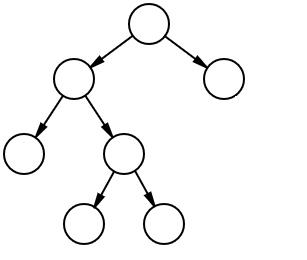

In [26]:
def check_full(root):
    if not root:
        return True
    if not root.left and not root.right:
        return True
    if root.left and root.right:
        return check_full(root.left) and check_full(root.right)
    return False

def if_full(root):
    if check_full(root):
        print("This Tree is Full")
    else:
        print("This Tree is not Full")

print(root)
if_full(root)


  1______
 /       \
2       __3
       /   \
      5     6
     / \
    7   8

This Tree is Full


**This solution has the time complexity of O(n) because we will have to traverse through every node in the tree**

## Checking if a Binary Tree is Perfect

A perfect binary tree is a binary tree in which all interior nodes have two children and all leaves have the same depth or same level.

For checking if a tree is perfect, you will notice that a perfect binary tree is always symmetrical **and** because it is a *binary* tree you will notice that there is a pattern with each level. Each level of a Binary tree is grows by a power of 2. 

With this we can say that a binary tree is perfect if the product of 2 by the power of height multiplied by 2 minus 1 (As there is only one root node) is equal to the size of the binary tree. 

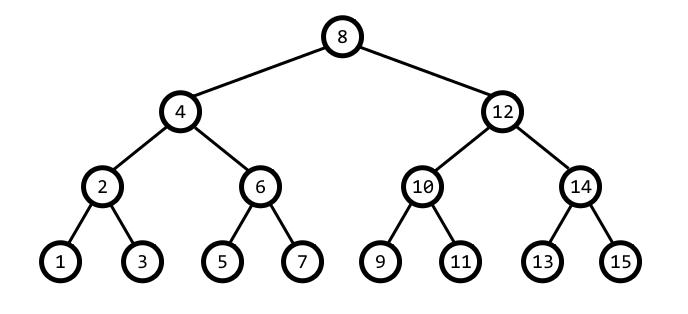

In [27]:
def check_perfect(root):
    return find_size(root) == (2 << find_height(root)) - 1

def if_perfect(root):
    if check_perfect(root):
        print("This Tree is Perfect")
    else:
        print("This Tree is not Perfect")

print(root)
if_perfect(root)

# Creating a perfect tree
insert_left(root, 4)
insert_right(root.left, 5)
root.right.left = Node(6)
root.right.left.left = None
root.right.left.right = None
root.right.right = Node(7)
print(root)
if_perfect(root)


  1______
 /       \
2       __3
       /   \
      5     6
     / \
    7   8

This Tree is not Perfect

    __1__
   /     \
  4       3
 / \     / \
2   5   6   7

This Tree is Perfect


**This solution has the time complexity of O(n) because we will have to traverse through every node in the tree to find the size**

*We do not need the max height but decided to use our previous function to save space*

## Checking if a Binary Tree is Complete

A complete binary tree is a binary tree in which every level, except possibly the last, is completely filled, and all nodes are as far left as possible.

To check of a binary tree is complete, we will traverse the binary tree in a breadth first approach and see if every node has either no children or two children (a left and a right). If we find a node with only a left child, there must not be any children afterwards. 
**A perfect binary tree is also complete**

We will use a flag to signify if a node has only one child.

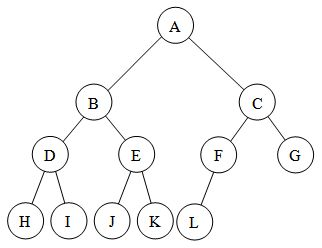

In [28]:
def check_complete(root):
     if root:
         queue = [root]
         flag = False
         while queue:
             node = queue.pop()
             if flag and (node.left or node.right):
                 return False
             if node.left:
                 queue.insert(0, node.left)
             else:
                 flag = True
             if node.right:
                 queue.insert(0, node.right)
             else:
                 flag = True
         return True
    
def if_complete(root):
    if check_complete(root):
        print("This Tree is Complete")
    else:
        print("This Tree is not Complete")

# Removing the right most node
root.right.right = None
print(root)
if_complete(root)

# Removing the left most node
root.left.left = None
print(root)
if_complete(root)


    __1__
   /     \
  4       3
 / \     /
2   5   6

This Tree is Complete

  __1__
 /     \
4       3
 \     /
  5   6

This Tree is not Complete


**This solution has the time complexity of O(n) because we will have to traverse through every node in the tree. However due to the queue the space complexity would also be of O(n) compared to O(h) in a depth level traversal where h is height**

# Finding the Lowest Common Ancestor of Two Nodes

The lowest common ancestor (LCA) of two nodes v and w in a tree or directed acyclic graph (DAG) T is the lowest (i.e. deepest) node that has both v and w as descendants, where we define each node to be a descendant of itself (so if v has a direct connection from w, w is the lowest common ancestor).

In this example below, v would be Node 9 and w would be Node 11. Their common ancestors would be Node 2 ad Node 1. However, the Lowest Common Ancestor would be Node 2 because it is the closest to both nodes height-wise.

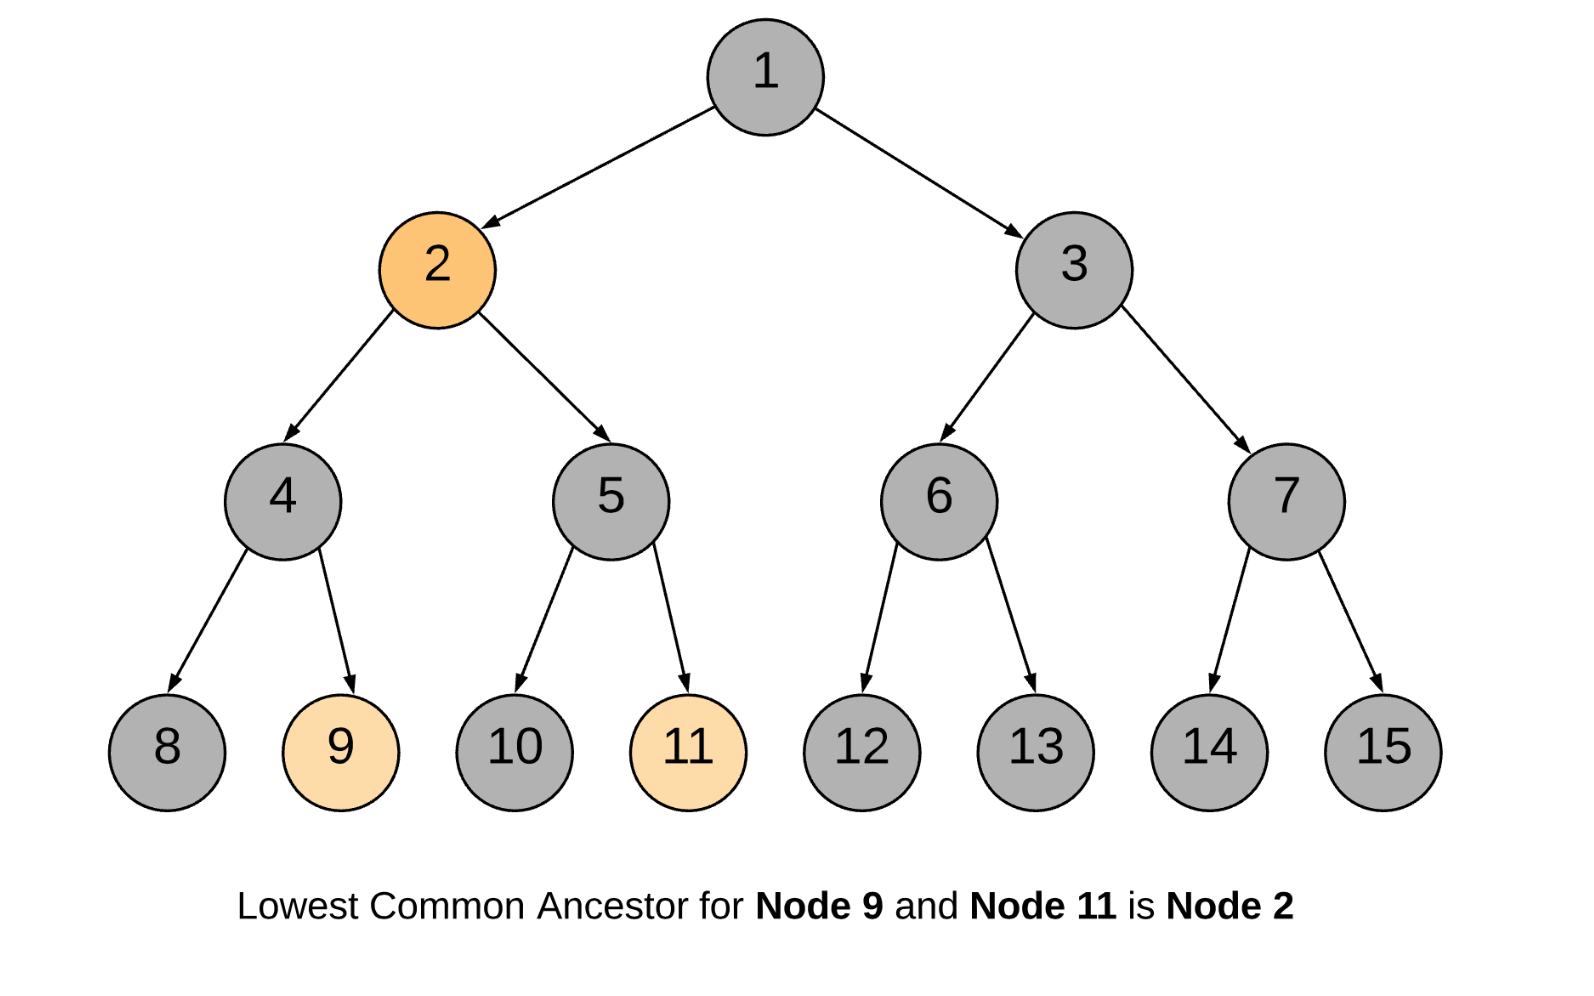

In [29]:
 def find_LCA(root, x, y):
     if root:
         if root.value == x or root.value == y:
             return root
         left = find_LCA(root.left, x, y)
         right = find_LCA(root.right, x, y)
         if left and right:
             return root
         return left if left is not None else right
        

print(root)
# Adding a few nodes to make the tree more intersting
root.left  = Node(2)
root.left.left = Node(4)
root.left.right = Node(5)
root.left.right.left = Node(7)
print(root)

print("The Lowest Common Ancestor is %d" %find_LCA(root, 2, 7).value)


  __1__
 /     \
4       3
 \     /
  5   6


    ____1__
   /       \
  2__       3
 /   \     /
4     5   6
     /
    7

The Lowest Common Ancestor is 2


**This solution has the time complexity of O(n) because we will have to traverse through every node in the tree in a bottom up fashion**

## Rotate the Binary Tree Left

Tree rotation is an operation on a binary tree that changes the structure without interfering with the order of the elements. A tree rotation moves one node up in the tree and one node down. It is used to change the shape of the tree, and in particular to decrease its height by moving smaller subtrees down and larger subtrees up, resulting in improved performance of many tree operations.

Rotating becomes important to Balance out a special kind of binary tree called a Binary Search Tree to maximize it's qualities.

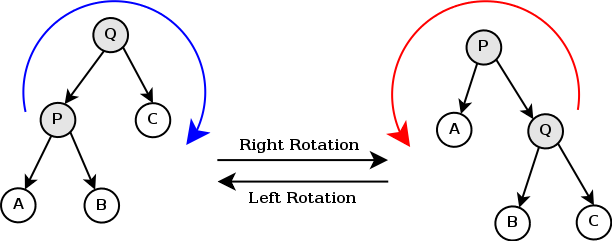

In [30]:
def rotate_left(root):
    if root and root.right:
        pivot = root.right
        root.right = pivot.left
        pivot.left = root
        root = pivot
    return root

print(root)
root = rotate_left(root)
print(root)


    ____1__
   /       \
  2__       3
 /   \     /
4     5   6
     /
    7


          __3
         /
    ____1
   /     \
  2__     6
 /   \
4     5
     /
    7



**This solution has the time complexity of O(1) because we are just swapping nodes**

## Rotate the Binary Tree Right

We will now do the opposite of what we did earlier with the Left Rotate.
*See the visual above for more details*

For the example we will rotate the tree twice

In [31]:
def rotate_right(root):
    if root and root.left:
        pivot = root.left
        root.left = pivot.right
        pivot.right = root
        root = pivot
    return root


print(root)
root = rotate_right(root)
print(root)


          __3
         /
    ____1
   /     \
  2__     6
 /   \
4     5
     /
    7


    ____1__
   /       \
  2__       3
 /   \     /
4     5   6
     /
    7



**This solution has the time complexity of O(1) because we are just swapping nodes**